# Data Pre-Processing Assignment

### Brayan Gutierrez, Katie, Jericka
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Reading Data

In [2]:
ground_water = pd.read_csv("ground_water_quality_2020_post.csv")
ground_water_df = pd.DataFrame(ground_water)
ground_water_df = ground_water_df.loc[:, ~ground_water_df.columns.str.contains('^Unnamed')]
print(ground_water_df)

     sno  district        mandal       village    lat_gis   long_gis   gwl  \
0      1  ADILABAD      Adilabad      Adilabad  19.668300  78.524700  7.10   
1      2  ADILABAD   Bazarhatnur   Bazarhatnur  19.458888  78.350833  3.35   
2      3  ADILABAD   Gudihatnoor   Gudihatnoor  19.525555  78.512222  5.05   
3      4  ADILABAD       Jainath       Jainath  19.730555  78.640000  2.10   
4      5  ADILABAD       Narnoor       Narnoor  19.495665  78.852654  1.38   
..   ...       ...           ...           ...        ...        ...   ...   
363  375   YADADRI  S.Narayanpur  S.Narayanpur  17.144719  78.860010  9.90   
364  376   YADADRI   Thurkapally    Gandamalla  17.733101  78.853831  5.74   
365  377   YADADRI     Valigonda    T. somaram  17.399953  78.952290  1.72   
366  378   YADADRI     Valigonda   Vemulakonda  17.347782  79.143433  1.65   
367  379   YADADRI       Y.Gutta    Mallapuram  17.633555  78.911638  4.92   

                season    pH   E.C  ...     SO4      Na      K 

## Data Cleaning
***

In [3]:
ground_water_df['pH'] = pd.to_numeric(ground_water_df['pH'], errors='coerce')
ground_water_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               368 non-null    int64  
 1   district          368 non-null    object 
 2   mandal            368 non-null    object 
 3   village           368 non-null    object 
 4   lat_gis           368 non-null    float64
 5   long_gis          368 non-null    float64
 6   gwl               365 non-null    float64
 7   season            368 non-null    object 
 8   pH                367 non-null    float64
 9   E.C               368 non-null    int64  
 10  TDS               368 non-null    float64
 11  CO3               368 non-null    float64
 12  HCO3              368 non-null    int64  
 13  Cl                368 non-null    int64  
 14  F                 368 non-null    float64
 15  NO3               368 non-null    float64
 16  SO4               368 non-null    float64
 1

### Separating Numeric and Non-numeric Columns

In [4]:
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

print(numeric)
print(nonnumeric)

Index(['sno', 'lat_gis', 'long_gis', 'gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3',
       'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'RSC  meq  / L'],
      dtype='object')
Index(['district', 'mandal', 'village', 'season', 'Classification',
       'Classification.1'],
      dtype='object')


### Finding Missing Data

In [5]:
ground_water_df[nonnumeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district          368 non-null    object
 1   mandal            368 non-null    object
 2   village           368 non-null    object
 3   season            368 non-null    object
 4   Classification    368 non-null    object
 5   Classification.1  368 non-null    object
dtypes: object(6)
memory usage: 17.4+ KB


In [6]:
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sno            368 non-null    int64  
 1   lat_gis        368 non-null    float64
 2   long_gis       368 non-null    float64
 3   gwl            365 non-null    float64
 4   pH             367 non-null    float64
 5   E.C            368 non-null    int64  
 6   TDS            368 non-null    float64
 7   CO3            368 non-null    float64
 8   HCO3           368 non-null    int64  
 9   Cl             368 non-null    int64  
 10  F              368 non-null    float64
 11  NO3            368 non-null    float64
 12  SO4            368 non-null    float64
 13  Na             368 non-null    float64
 14  K              368 non-null    float64
 15  Ca             368 non-null    float64
 16  Mg             368 non-null    float64
 17  T.H            368 non-null    float64
 18  SAR       

### One missing value in pH, so we will fill that missing value in with the median

In [7]:
df_copy = ground_water_df.copy()
med = df_copy[numeric].median()
ground_water_df[numeric] = df_copy[numeric].fillna(med)
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sno            368 non-null    int64  
 1   lat_gis        368 non-null    float64
 2   long_gis       368 non-null    float64
 3   gwl            368 non-null    float64
 4   pH             368 non-null    float64
 5   E.C            368 non-null    int64  
 6   TDS            368 non-null    float64
 7   CO3            368 non-null    float64
 8   HCO3           368 non-null    int64  
 9   Cl             368 non-null    int64  
 10  F              368 non-null    float64
 11  NO3            368 non-null    float64
 12  SO4            368 non-null    float64
 13  Na             368 non-null    float64
 14  K              368 non-null    float64
 15  Ca             368 non-null    float64
 16  Mg             368 non-null    float64
 17  T.H            368 non-null    float64
 18  SAR       

## Outlier Detection

### We will be using histograms and boxplots for each numeric variable to determine any possible outliers:

#### Serial Number (sno)

<Axes: >

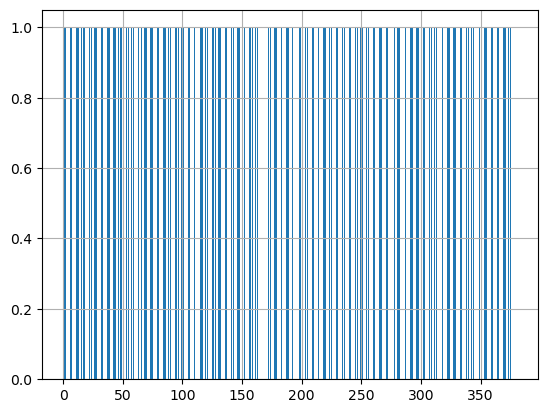

In [8]:
ground_water_df['sno'].hist(bins = 1000)

<Axes: >

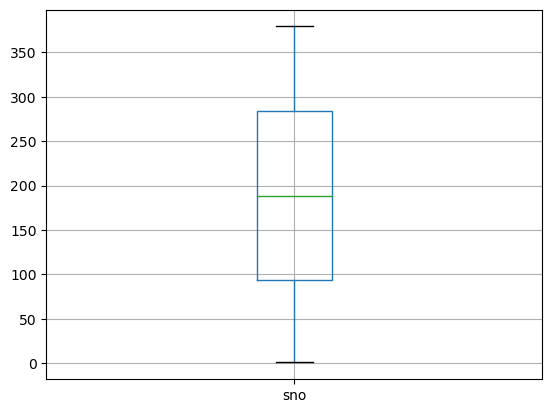

In [9]:
ground_water_df.boxplot(column=['sno'])

#### Lattitude (lat_gis)

<Axes: >

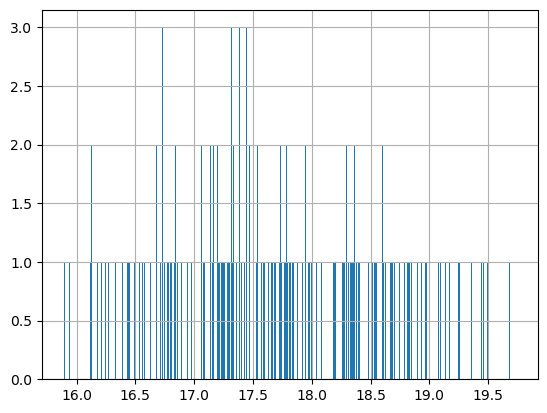

In [10]:
ground_water_df['lat_gis'].hist(bins = 1000)

<Axes: >

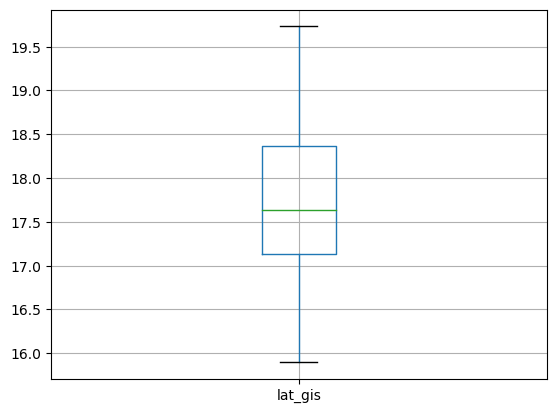

In [11]:
ground_water_df.boxplot(column=['lat_gis'])

#### Longitude (long_gis)

<Axes: >

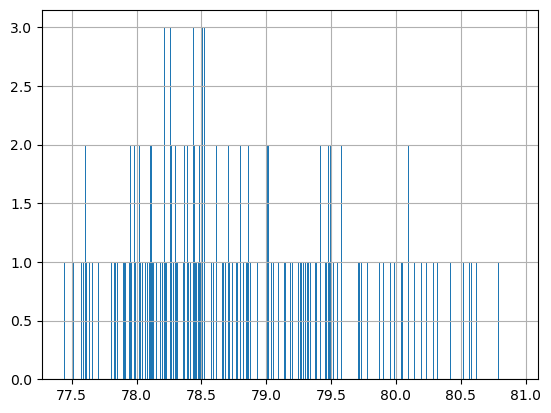

In [12]:
ground_water_df['long_gis'].hist(bins = 1000)

<Axes: >

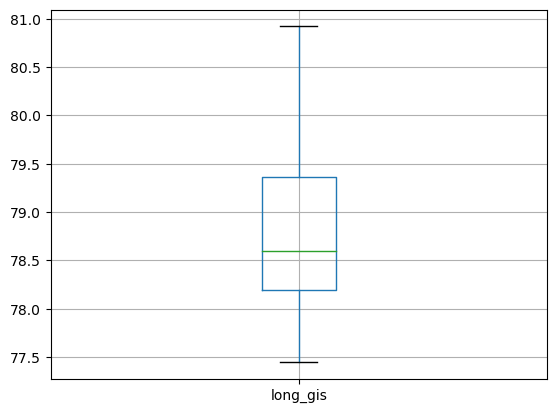

In [13]:
ground_water_df.boxplot(column=['long_gis'])

#### Ground Water Level (gwl)

<Axes: >

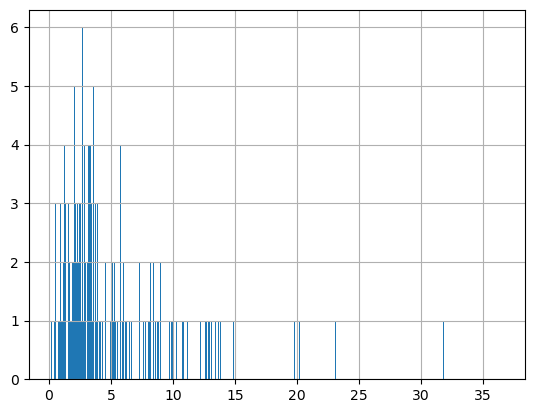

In [14]:
ground_water_df['gwl'].hist(bins = 1000)

<Axes: >

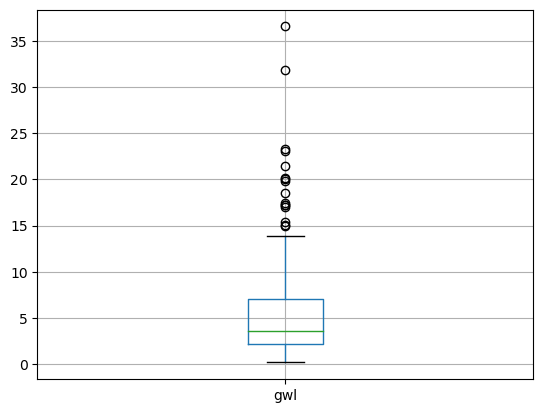

In [15]:
ground_water_df.boxplot(column=['gwl'])

#### pH

<Axes: >

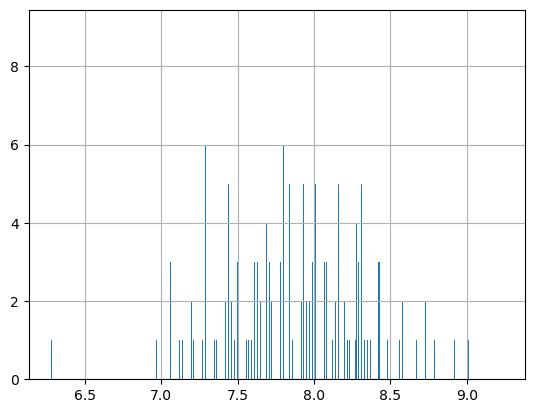

In [16]:
ground_water_df['pH'].hist(bins = 1000)

<Axes: >

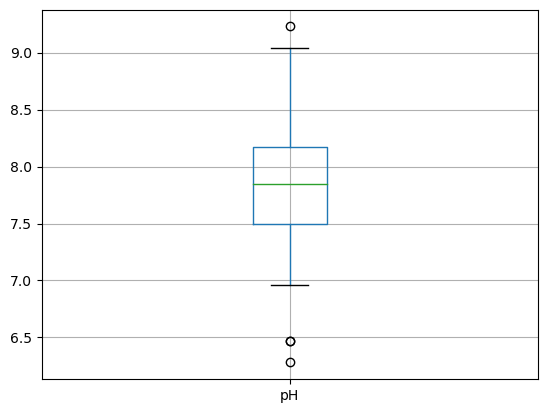

In [17]:
ground_water_df.boxplot(column=['pH'])

#### Electrical Conductivity (E.C)

<Axes: >

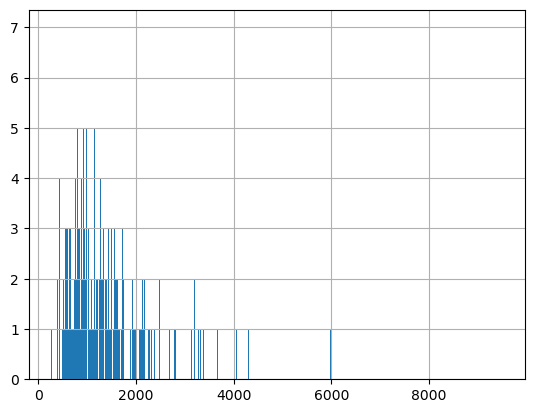

In [18]:
ground_water_df['E.C'].hist(bins = 1000)

<Axes: >

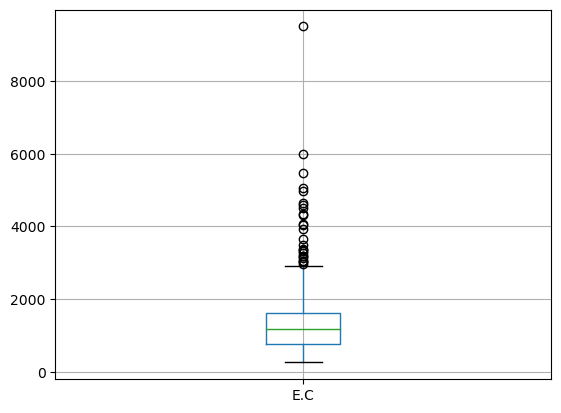

In [19]:
ground_water_df.boxplot(column=['E.C'])

#### Total Dissolved Solids (TDS)

<Axes: >

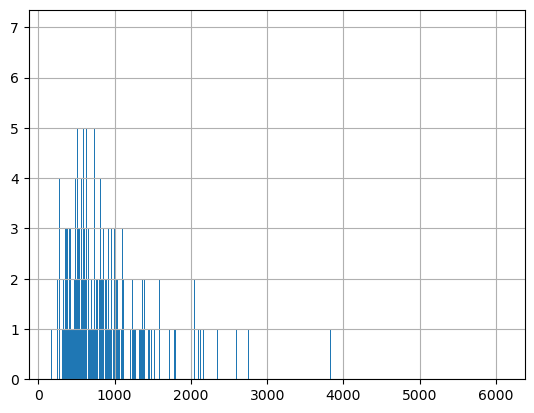

In [20]:
ground_water_df['TDS'].hist(bins = 1000)

<Axes: >

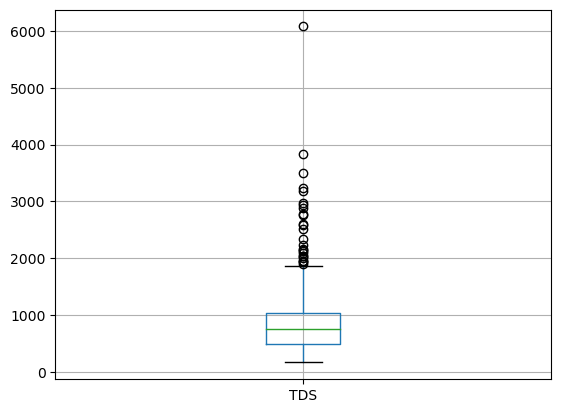

In [21]:
ground_water_df.boxplot(column=['TDS'])

#### Carbonate Present (CO3)

<Axes: >

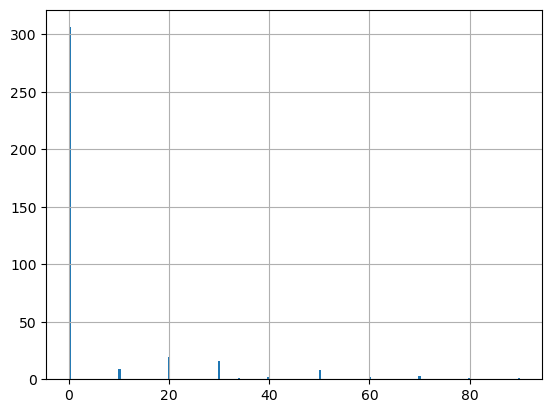

In [22]:
ground_water_df['CO3'].hist(bins = 200)

#### Bicarbonate Present (HCO3)

<Axes: >

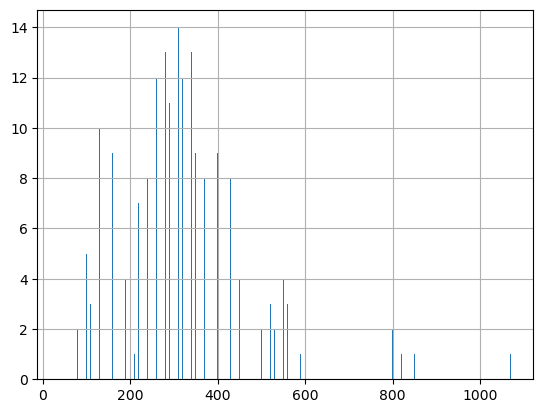

In [23]:
ground_water_df['HCO3'].hist(bins = 1000)

#### Chloride Present (Cl)

<Axes: >

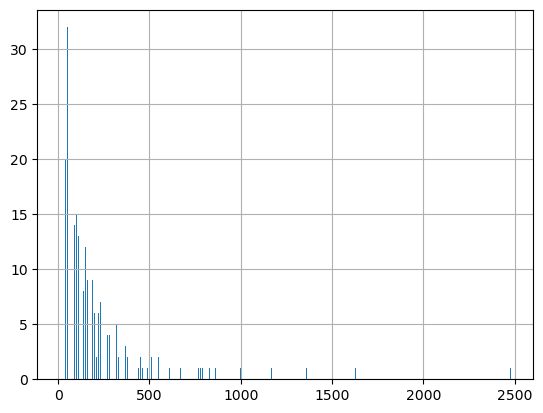

In [24]:
ground_water_df['Cl'].hist(bins = 1000)

#### Flouride Present (F)

<Axes: >

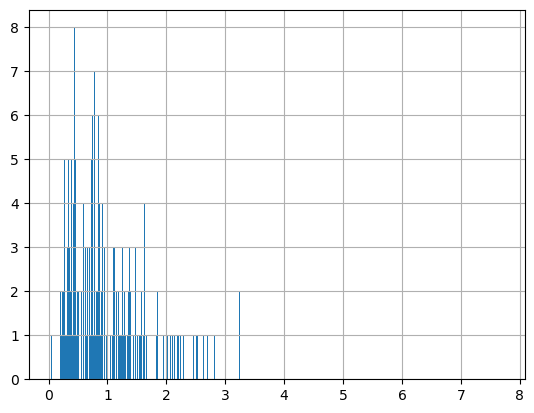

In [25]:
ground_water_df['F'].hist(bins = 1000)

#### Nitrate Present (NO3)

In [26]:
ground_water_df['N03'].hist(bins = 100)

KeyError: 'N03'

In [ ]:
ground_water_df.boxplot(column=['NO3'])

#### Sulphate Present (SO4)

In [ ]:
ground_water_df['SO4'].hist(bins = 100)

#### Sodium Present (Na)

In [ ]:
ground_water_df['Na'].hist(bins = 100)

#### Potassium Present (K)

In [ ]:
ground_water_df['K'].hist(bins = 100)

#### Calcium Present (Ca)

In [ ]:
ground_water_df['Ca'].hist(bins = 100)

#### Magnessium Present (Mg)

In [ ]:
ground_water_df['Mg'].hist(bins = 100)

#### Total Hardness (T.H)

In [ ]:
ground_water_df['T.H'].hist(bins = 100)

#### Sodium Adsoption Ratio (SAR)

In [ ]:
ground_water_df['SAR'].hist(bins = 100)

#### Residual Sodium Carbonate (RSC mew/L)

In [ ]:
ground_water_df['RSC  meq  / L '].hist(bins = 100)